<a href="https://colab.research.google.com/github/Mairakhafagy/yolo-v3/blob/main/objecte_detection_YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cars.jpg to cars (1).jpg


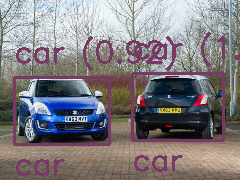

In [ ]:
import cv2
import numpy as np
from google.colab import files

# Upload the YOLOv3 files and image
uploaded = files.upload()

# Load YOLO
net = cv2.dnn.readNet("/content/yolov3.weights", "/content/yolov3.cfg")
classes = []

with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Manually specify the output layer indices based on yolov3.cfg
output_layer_indices = [200, 227, 254]

output_layers = [net.getLayerNames()[i - 1] for i in output_layer_indices]

# Read and preprocess the image
img = cv2.imread("/content/cars.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

# Process the detected objects
class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.2:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Perform non-maximum suppression
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw bounding boxes and labels on the image
font = cv2.FONT_HERSHEY_SIMPLEX

for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        color = colors[class_ids[i]]  # Get the color for this class

        # Display the label and confidence score
        text = f"{label} ({confidence:.2f})"

        # Draw the bounding box
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

        # Draw the label and confidence score
        cv2.putText(img, text, (x, y - 15), font, 1, color, 2)

        # Save the object type (e.g., "cat") directly on the image
        cv2.putText(img, label, (x, y + h + 30), font, 1, color, 2)

from google.colab.patches import cv2_imshow



# Display the image using cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
